### Create KMeans clustering

In [59]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

In [36]:
movie = pd.read_csv('/Users/emma/Dropbox (School of Management)/MSBA/all courses/第一学期/431datavisualization/第一周/movie.csv', encoding = "iso-8859-1")
movie.head()

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [37]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day_of_Week         608 non-null object
Director            608 non-null object
Genre               608 non-null object
Movie_Title         608 non-null object
Release_Date        608 non-null object
Studio              608 non-null object
Adjusted_Gross      608 non-null object
Budget              608 non-null float64
Gross_rev           608 non-null object
IMDb_Rating         608 non-null float64
MovieLens_Rating    608 non-null float64
Overseas_rev        608 non-null object
Overseas_Perc       608 non-null float64
Profit              608 non-null object
Profit_perc         608 non-null float64
Runtime_min         608 non-null int64
US_rev              608 non-null float64
US_perc             608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ KB


In [38]:
k_means = KMeans(n_clusters = 3)

In [46]:
cluster_source = movie.loc[:, ['Budget', 'IMDb_Rating', 'MovieLens_Rating']]
cluster_source.head()

,Budget,IMDb_Rating,MovieLens_Rating
0,170.0,6.7,3.26
1,66.0,6.6,2.97
2,100.0,6.1,2.93
3,42.0,7.2,3.62
4,150.0,8.0,3.65


In [50]:
kmeans = k_means.fit(cluster_source)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
labels = kmeans.predict(cluster_source)

In [76]:
movie['cluster'] = labels
movie.head()

,Day_of_Week,Director,Genre,Movie_Title,Release_Date,Studio,Adjusted_Gross,Budget,Gross_rev,IMDb_Rating,MovieLens_Rating,Overseas_rev,Overseas_Perc,Profit,Profit_perc,Runtime_min,US_rev,US_perc,cluster
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6,1
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4,0
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1,2
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7,0
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6,1


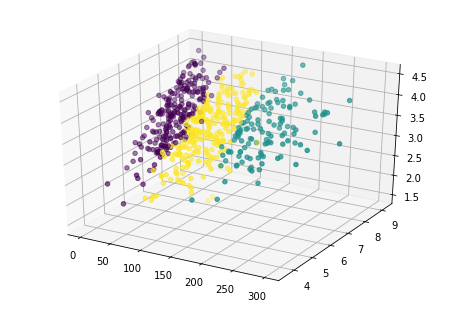

In [67]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(cluster_source.Budget, cluster_source.IMDb_Rating, cluster_source.MovieLens_Rating, c=labels)

### Demonstrate use of elbow method (as described in reading and lecture) in notebook

Elbow is a graphical tool to estimate the optimal number fo clusters k for a given task. Elbow method is to identify the value fo k where the distortion begins to increase most rapidly, which will become clearer if we plot the distortion for different values of k.

In [90]:
! pip install ggplot

    100% |████████████████████████████████| 2.2MB 372kB/s ta 0:00:011


In [91]:
from ggplot import *

/Users/emma/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/emma/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/emma/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


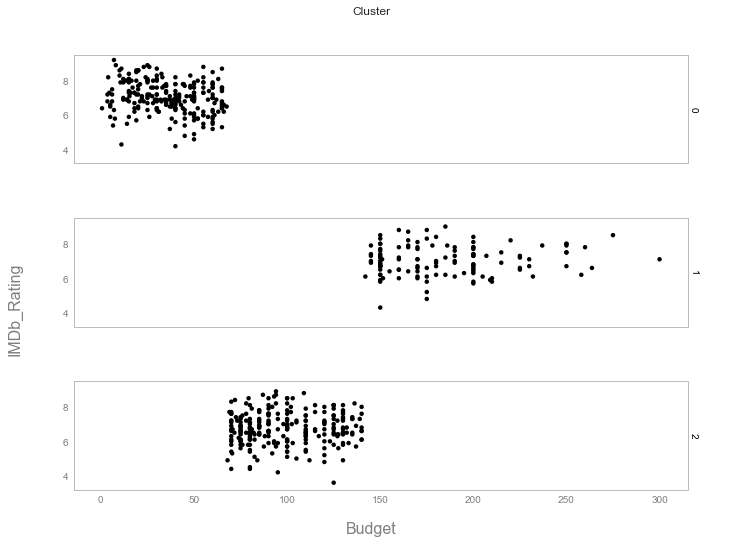

<ggplot: (296343714)>

In [96]:
p = ggplot(movie, aes(x='Budget',y='IMDb_Rating')) + facet_grid("cluster") +\
    geom_point() + \
    theme_bw() + \
    labs(title = "Cluster",
        x = '',
        y = '') + \
    theme(axis_title_x = element_text(color = 'gray', size=16, family="Arial"),
         axis_title_y = element_text(color = 'gray', size=16, family="Arial")) 
    
p

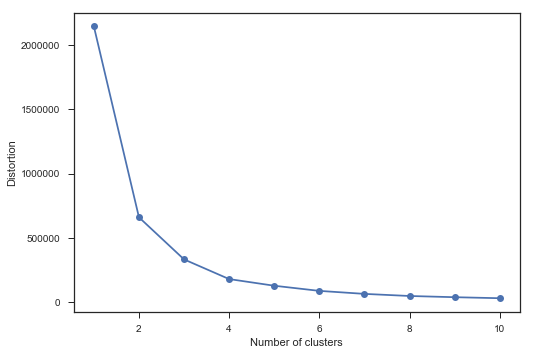

In [80]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,
               init = 'k-means++',
               n_init = 10,
               max_iter = 300,
               random_state = 0)
    km.fit(cluster_source)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [84]:
km =  KMeans(n_clusters=3,
             init='k-means++',
             n_init=10,
             max_iter=300,
             tol=1e-04,
             random_state=0)
y_km = km.fit_predict(cluster_source)

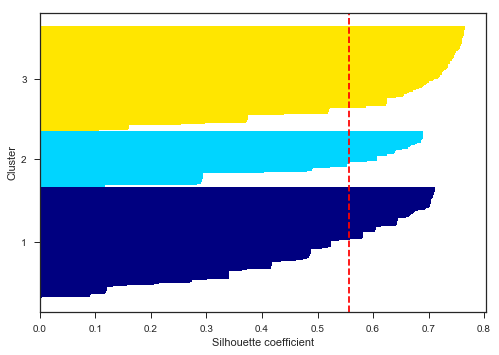

In [88]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(cluster_source, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.0)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color='red',
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.show()